# Encontrar os Porquês de Saida
    
    O Dataset que será visto abaixo mostra informações de de alguns clientes de determinada empresa, e mostra também se este cliente parou de fazer negócio com a empresa ou não.
    
    Com isto em mãos podemos tentar "enxergar" por meio destes dados e com isto fazer as seguinte pergunta:
    
    Por que este Cliente deixo de Fazer negócio?
    
    Com esta simples pergunta, podemos seguir vários caminhos para se aproximar da resposta.
    E a resposta para isto é o que procuraremos logo abaixo.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Churn Modeling.csv") # Importando Dataset (Site Kaggle)
display(df) # Mostrar o Dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.describe() # Ver algumas informações estatísticas

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [3]:
df.drop(columns = ["RowNumber","CustomerId"],inplace=True)# Retirar as colunas RowNumber e CustomerID 
display(df)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
gender_value = df['Gender'].value_counts() #Ver a Proporção de Homens e Mulheres

<AxesSubplot:ylabel='Gender'>

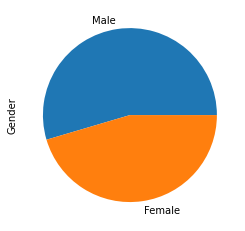

In [5]:
df['Gender'].value_counts().plot.pie()

In [6]:
df['Exited'].value_counts() #Ver Proporção de Pessoas que sairam
exit_df = df.loc[(df['Exited'] == 1)] # Criando um dataframe somente com as pessoas que sairam

In [7]:
display(exit_df) # Mostrando este novo dataset

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [8]:
exit_df['Gender'].value_counts() #Mostrando a proporção de homens e mulheres nesta nova tabela.

Female    1139
Male       898
Name: Gender, dtype: int64

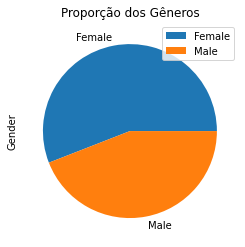

In [76]:
# Informações acima em forma Gráfica
exit_df['Gender'].value_counts().plot.pie()
plt.title('Proporção dos Gêneros') 
plt.legend()

In [10]:
exit_df['Geography'].value_counts()# Proporção de cada pais

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

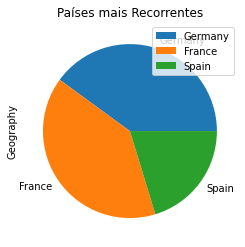

In [75]:
# Mostrar a informação acima em forma de gráfico
exit_df['Geography'].value_counts().plot.pie()
plt.title('Países mais Recorrentes') 
plt.legend()

In [12]:

exit_df['Age'].median()#Mediana das idades

45.0

In [13]:
print(exit_df['CreditScore'].median())#Pontuação de Crédito destas pessoas usando uma mediana
print(exit_df['CreditScore'].max()) # Pontuação Máxima de Crédito
print(exit_df['CreditScore'].min()) # Pontuação Minima

# Podemos notar que a Mediana é bem elevada para estas pessoas que sairam
# Já que a máxima é 850

646.0
850
350


In [14]:
print(exit_df['EstimatedSalary'].median()) # Mediana dos Salários'
print(exit_df['EstimatedSalary'].max()) # Maior Salário
print(exit_df['EstimatedSalary'].min()) # Menor Salário

# Vemos que são pessoas com faixa salarial elevada pela mediana e que como mostrou a pontuação anterior com uma
# boa pontuação como pagadores.

102460.84
199808.1
11.58


In [15]:
exit_df['HasCrCard'].value_counts()# Contar quantas Pessoas Possuem Cartão de Crédito

# Vemos com isto que pelo que consta o fato da saida destas pessoas podem estar atrelado
# ao fato de possuírem o cartão de crédito, já que o mesmo possui um número elevado,
# no campo dos indivíduos que sairam.

1    1424
0     613
Name: HasCrCard, dtype: int64

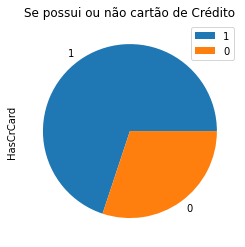

In [74]:
# Mostrar informação acima em forma de gráfico
exit_df['HasCrCard'].value_counts().plot.pie()
plt.title('Se possui ou não cartão de Crédito') 
plt.legend()

In [17]:
exit_df['IsActiveMember'].value_counts() # Se a pessoa é um membro ativo ou não
#Nota-se que a Proporção de pessoas ativas é inferior a de pessoas inativas 

0    1302
1     735
Name: IsActiveMember, dtype: int64

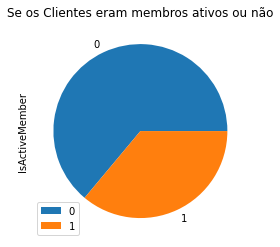

In [73]:
# Mostrar informação acima em forma de gráfico
exit_df['IsActiveMember'].value_counts().plot.pie()
plt.title('Se os Clientes eram membros ativos ou não') 
plt.legend()

In [19]:
print(exit_df['Balance'].median()) # Mediana do Balanço
print(exit_df['Balance'].max()) # Valor Máximo do Balanço
print(exit_df['Balance'].min()) # Valor Mínimo do Balanço

109349.29
250898.09
0.0


In [20]:
val = exit_df['Surname'].value_counts() # Recorrencia de certos sobrenomes
nval = val.head(10) # Os 10 nomes que mais se repetem

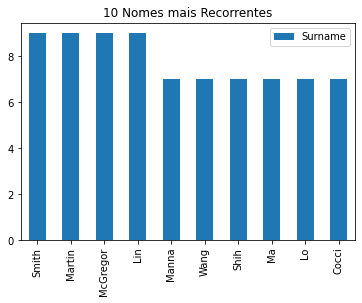

In [72]:
# Mostrar informação acima em forma de gráfico
nval.plot.bar() # Plotando os 10 nomes que mais se repetem
plt.title('10 Nomes mais Recorrentes') 
plt.legend()

In [22]:
print(exit_df['Tenure'].median()) # Mediana de Posses 
print(exit_df['Tenure'].max()) # Valor Máximo de Posses
print(exit_df['Tenure'].min()) # Valor Mínimo de Posses

5.0
10
0


In [23]:
print(exit_df['NumOfProducts'].median()) # Mediana do Número de Produtos
print(exit_df['NumOfProducts'].max()) # Máximo do Número de Produtos
print(exit_df['NumOfProducts'].min()) # Mínimo do Númeor de Produtos

1.0
4
1


# Considerações sobre as Informações Mostradas

Apartir daqui irei tomar atitudes mas aprofundadas sobre o por que do Comportamento de Saída
    de alguns clientes. Levando em consideração os dados apresentados acima.


In [24]:
active_df =  exit_df.loc[(exit_df['IsActiveMember'] == 1)] # Criando um dataframe somente com as pessoas ativas 
                                                                                                #dentre as que sairam
display(active_df)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
46,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,Okagbue,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
90,Heap,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1
104,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9934,West,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9947,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9960,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9981,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1


In [25]:
# Sobrenome recorrentes nesta lista
sur = active_df['Surname'].value_counts()
sur.head(10)

Smith         6
Napolitani    4
Ch'ang        4
Lo            4
Ko            4
Martin        4
Mao           4
Fanucci       3
Douglas       3
Lo Duca       3
Name: Surname, dtype: int64

In [26]:
print(active_df['Tenure'].mean()) # media de posses
print(active_df['Tenure'].median()) # mediana de posses

4.789115646258503
5.0


In [27]:
print(active_df['NumOfProducts'].mean()) # média do numero de produdos
print(active_df['NumOfProducts'].median()) # mediana do numero de produtos

1.5346938775510204
1.0


In [28]:
print(active_df['Balance'].mean())# média dos ativos na lista daqueles que sairam
print(active_df['Balance'].median()) # mediano dos ativos na lista daqueles que sairam

91320.6364761905
109922.61


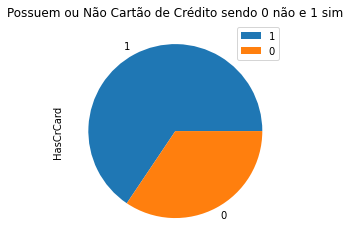

In [71]:
active_df['HasCrCard'].value_counts().plot.pie()
plt.title('Possuem ou Não Cartão de Crédito sendo 0 não e 1 sim') 
plt.legend()

In [30]:
print(active_df['EstimatedSalary'].mean())
print(active_df['EstimatedSalary'].median())

100654.02236734697
102517.83


In [31]:
print(active_df['CreditScore'].mean())
print(active_df['CreditScore'].median())

645.2476190476191
644.0


In [32]:
print(active_df['Age'].mean())
print(active_df['Age'].median())

44.76326530612245
45.0


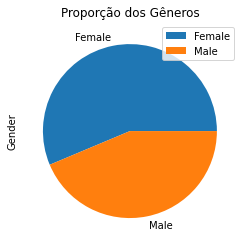

In [70]:
active_df['Gender'].value_counts().plot.pie() # Proporção de Homens e Mulheres ativos
plt.title('Proporção dos Gêneros') 
plt.legend()

In [47]:
balance_null = active_df.loc[(active_df['Balance'] == 0.0)] # Pessoas com balanço zerado sendo ativas no banco
display(balance_null)


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
90,Heap,647,Spain,Female,44,5,0.0,3,1,1,174205.22,1
104,Dunbabin,670,Spain,Female,65,1,0.0,1,1,1,177655.68,1
126,MacDonald,549,France,Female,52,1,0.0,1,0,1,8636.05,1
184,Cocci,804,France,Female,50,4,0.0,1,1,1,8546.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9489,Liang,791,France,Female,33,3,0.0,1,1,1,144413.92,1
9572,Collier,644,Spain,Male,18,7,0.0,1,0,1,59645.24,1
9727,Ferri,530,France,Female,45,1,0.0,1,0,1,190663.89,1
9884,Sergeyeva,751,France,Female,48,4,0.0,1,0,1,30165.06,1


In [58]:
print('Media de Pontuação de Crédito: ',balance_null['CreditScore'].mean())
print('Mediana de Pontuação de Crédito',balance_null['CreditScore'].median())
print('Média de Salário Estimado :',balance_null['EstimatedSalary'].mean())
print('Mediana de Salário Estiamdo',balance_null['EstimatedSalary'].median())
print('Média da Quantidade de Posses :',balance_null['Tenure'].mean())
print('Mediana da Quantidade de Posses',balance_null['Tenure'].median())
print('Média do Número de Produtos : ',balance_null['NumOfProducts'].mean())
print('Mediana do Número de Produtos : ',balance_null['NumOfProducts'].median())


Media de Pontuação de Crédito:  638.3166666666667
Mediana de Pontuação de Crédito 635.5
Média de Salário Estimado : 101932.29433333334
Mediana de Salário Estiamdo 100285.97
Média da Quantidade de Posses : 4.683333333333334
Mediana da Quantidade de Posses 4.0
Média do Número de Produtos :  1.5944444444444446
Mediana do Número de Produtos :  1.0
Nomes mais Recorrentes:
 Yeh        3
Hughes     2
Niu        2
Chien      2
Mancini    2
Scott      2
Ko         2
Hs?        2
Edwards    1
Craig      1
Name: Surname, dtype: int64


In [60]:
sur_null = balance_null['Surname'].value_counts()
print('Nomes mais Recorrentes:\n',sur_null)

Nomes mais Recorrentes:
 Yeh          3
Hughes       2
Niu          2
Chien        2
Mancini      2
            ..
O'Donnell    1
Ignatiev     1
Horrocks     1
Frye         1
Liu          1
Name: Surname, Length: 171, dtype: int64


In [62]:
print('Regiões Recorrentes\n : ',balance_null['Geography'].value_counts())

Regiões Recorrentes
 :  France    128
Spain      52
Name: Geography, dtype: int64


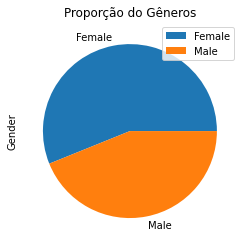

In [69]:
balance_null['Gender'].value_counts().plot.pie()
plt.title('Proporção do Gêneros') 
plt.legend()

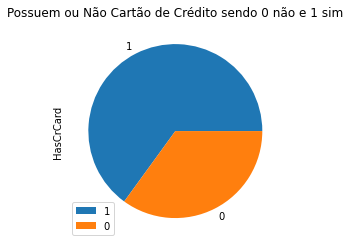

In [68]:
balance_null['HasCrCard'].value_counts().plot.pie()
plt.title('Possuem ou Não Cartão de Crédito sendo 0 não e 1 sim') 
plt.legend()

# Considerações Finais

Ao que consta nos dados podemos afirmar com certo grau de veracidade que o motivo de tais pessoas fecharem suas contas neste banco seria por conta de Taxas de Cartão de Crédito, visto que 100% das pessoas que sairam tinham um cartão.

Estas pessoas em geral se concentram na França, possuem entre 45 anos de idade e possuem uma vida financeira comfortável e com um bom número de posses.

Com base nestas informações aconselho uma revisão da taxa de cartões de clientes acima de 100.000 e benefícios oferecidos para os mesmos já que representam uma massiva maioria dos evasores.

Nota-se que durante a manipulação dos dados acabou-se utilizando os clientes evasores que eram ativos ao invés dos que eram inativos, isso deve-se que do ponto de vista de negócio o cliente ativo teria muito mais peso para o banco diferente do que era inativo, já que sendo ativo o mesmo circularia mais dinheiro e negócios do que o outro.

